### Задание

1. Реализовать оптимизацию методом градиентного спуска для x^2(np.sin(0,5_x)^2+1).  
2. Какие параметры шага и количества итераций оптимальны?  
3. При каких значениях шага оптимизиция не выходит из локальных минимумов?

#### Решение

In [1]:
import numpy as np
import sympy as sym

In [2]:
class Optimazer:
    def __init__(self, alpha, n_iter):
        self.alpha = alpha
        self.n_iter = n_iter
    
    def fit(self, function, x0):
        gradient = sym.diff(function)
        print(f'Начальная точка - {x0}, значение функции - {function.subs(x, x0)}')
        i = 0
        list_min = [x0]
        x_ = x0
        while i < self.n_iter:
            x_ -= self.alpha * gradient.subs(x, x_)
            i += 1
            if function.subs(x, x_) > abs(function.subs(x,list_min[len(list_min)-1])) * 10000:
                # Уменьшаем alpha, т.к. вероятно метод расходится
                i = 0
                x_ = min(list_min)
                self.alpha = self.alpha / 5

            if (i == self.n_iter) and (function.subs(x, x_) < function.subs(x, list_min[len(list_min)-1])):
                # Увеличиваем alpha, т.к. возможно находимся в локальном минимуме
                list_min.append(x_)
                i = 0
                self.alpha = 5 * self.alpha
                
        min_f, point = min({function.subs(x, el): el for el in list_min}.items())
        return f'Минимальное значение функции = {min_f} в точке ({point})'

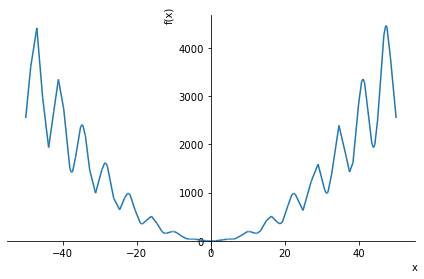

In [3]:
x = sym.symbols('x')

f = (x**2)*(sym.sin(0.5*x)**2+1)
sym.plot(f,(x,-50,50))

In [4]:
alpha = 0.1
opt = Optimazer(alpha, 100)
x_ = opt.fit(f, np.random.uniform(-50, 50))
x_

Начальная точка - -21.16990698526263, значение функции - 824.917727184501


'Минимальное значение функции = 0 в точке (0)'

Ответ 2:  
    Уже как минимум со значения alpha>=0.04 существуют начальные точки, на которых метод не сходится.
    При уменьшении alpha увеличивается количество начальных точек, для которых не можем преодолеть локальный минимум.
    Для нахождения минимума установим первоначальное значение альфа и, если метод расходится, то уменьшаем альфа и повторяем.
    Когда находим локальный минимум, увеличиваем альфа и таким образом пытаемся вырваться из него и найти новый минимум.  
Ответ 3:  
    При alpha<0.05 оптимизация не выходит из локальных минимумов для многих начальных точек.